In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from collections import Counter
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.0 MB/s eta 0:00:00


In [ ]:
# https://drive.google.com/file/d/1vBgq_hkXX4iJWpKsWqy8zZ35clF6Dtc-/view?usp=drive_link
!gdown --id 1sNeOcbGFzBRVThRrLTzhBmudeTCQ0--P
!gdown --id 1eDsWvpWB4abiwPf_ranwiCt8hMqZWX6-


In [ ]:
!unzip /content/data_phase-2.zip -d /content/captured_data/
!unzip /content/phase-2.zip -d /content/old_data/
!rm /content/phase-2.zip
!rm /content/data_phase-2.zip

# Load data

In [2]:
x_train = "/content/processed_data_x.parquet"
y_train = "/content/processed_data_y.parquet"
# captured_data = "/content/total_data.parquet"

X = pd.read_parquet(x_train)
y = pd.read_parquet(y_train)
# X_cap = pd.read_parquet(captured_data)


In [ ]:
print(X.info())
print(y.info())
# print(X_cap.info())

# t-SNE

In [13]:
#@title Define t-SNE plot and feature important using catboostfrom collections import Counter

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import catboost as cb
import re

def under_sample_data(data):
    # Separate the input features and the target variable
    X = data.drop('label', axis=1)
    y = data['label']

    # Check the distribution of the target variable
    print("Original distribution of target: ", Counter(y))


    # Perform the under-sampling using RandomUnderSampler
    rus = RandomUnderSampler(sampling_strategy={1: 4000, 0: 4000})
    X_train_resampled, y_train_resampled = rus.fit_resample(X, y)

    # Check the distribution of the target variable after under-sampling
    print("Distribution after under-sampling: ", Counter(y_train_resampled))

    # Combine the under-sampled X and y into a DataFrame
    data_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)
    data_resampled['label'] = y_train_resampled

    return data_resampled


def visualize_chart_and_feature(X, y):

  # # Plot t-SNE chart
  # df = under_sample_data(df)

  # df_x = df.drop("label", axis=1)
  # df_y = df["label"]

  # # Create a t-SNE model with two components
  # tsne_model = TSNE(n_components=2, random_state=0)

  # # Apply the model to your data DataFrame
  # tsne_data = tsne_model.fit_transform(df)

  # # Define the color for each label
  # colors = ["red", "blue" ]
  # labels= ['Fraud', 'No Fraud']
  # # Plot the results
  # fig, ax = plt.subplots()
  # for i in range(len(colors)):
  #     x = tsne_data[df_y == i, 0]
  #     y = tsne_data[df_y == i, 1]
  #     ax.scatter(x, y, c=colors[i], label=labels[i])

  # plt.xlabel('t-SNE Component 1')
  # plt.ylabel('t-SNE Component 2')
  # plt.title('t-SNE Visualization')
  # ax.legend()
  # plt.show()


  #Check feature important by using catboost

  # Fit a CatBoostClassifier model on the data

  df_x = X
  df_y = y

  model = cb.CatBoostClassifier(eval_metric = "AUC", silent=True)
  model.fit(df_x, df_y)

  # Get the feature importances
  feature_importances = model.get_feature_importance()
  keys = df_x.columns
  importances_dict = {keys[i]: feature_importances[i] for i in range(len(keys))}
  importances_dict = dict(sorted(importances_dict.items(), key=lambda item: item[1]))

  # print(importances_dict)

  # # Create a color map with a different color for each feature
  colors = plt.cm.Set3(np.linspace(0, 1, len(df_x.columns)))

  print(len(colors), len(keys))

  # Create a bar plot of the feature importances
  plt.barh(np.arange(len(df_x.columns)), importances_dict.values(), color=colors)
  plt.yticks(np.arange(len(df_x.columns)), importances_dict.keys())
  plt.xlabel("Feature Importance")
  plt.title("Feature Importances")
  plt.show()

  #plot feature correlation

41 41


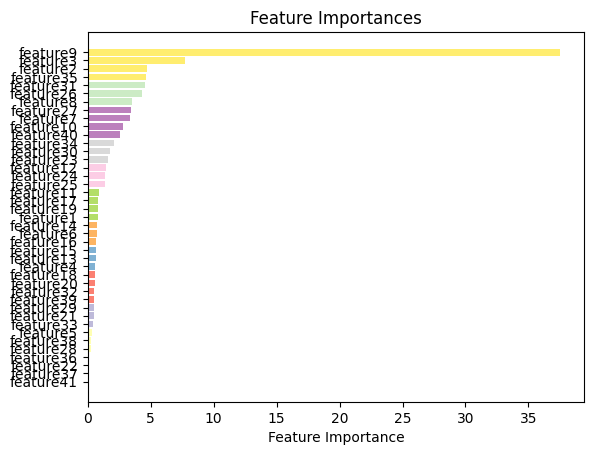

CPU times: user 44.9 s, sys: 3.51 s, total: 48.5 s
Wall time: 17.7 s


In [14]:
#@title Before processed - Raw dataset

%%time
visualize_chart_and_feature(X, y)

As we can see here, it hard and may take more effort, even by human to distinguish "Fraud" and "No Fraud" data points.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = new_data.corr()

# Create a larger figure
fig, ax = plt.subplots(figsize=(20, 15))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr, annot=True, fmt='.2f', ax=ax)

corr['label'].sort_values(ascending=False)

In [ ]:
#@title Feature Selection and Dimension Reduction

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef

def select_features_using_mcc(y, y_hat, threshold):
    """
    Selects the features with MCC scores higher than the given threshold and plots a barh chart of MCC scores.

    Parameters:
    X: 2D array-like of shape (n_samples, n_features)
        The training input samples.
    y: 1D array-like of shape (n_samples,)
        The target values.
    threshold: float
        The threshold for selecting features.
    """
    n_features = X.shape[1]
    mcc_scores = []
    for i in range(n_features):
        mcc = matthews_corrcoef(y, y_hat)
        mcc_scores.append(mcc)

    # Select the features with MCC scores higher than the threshold
    selected_features = [i for i in range(n_features) if mcc_scores[i] > threshold]

    # Plot a barh chart of MCC scores
    plt.barh(range(n_features), mcc_scores)
    plt.yticks(range(n_features))
    plt.xlabel('MCC Score')
    plt.ylabel('Feature')
    plt.show()

    return selected_features



In [ ]:
#@title Test




from sklearn.cluster import DBSCAN
import catboost
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named df with binary labels 0 for not fraud and 1 for fraud
X = df.drop('label', axis=1)
y = df['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=1000,
                           learning_rate=0.02,
                           depth=7,
                           eval_metric='AUC')

# Fit model
model.fit(X_train[:-10000], y_train[:-10000], eval_set = [(X_train[-10000:], y_train[-10000:])], verbose = 50 )

# Get predictions
preds = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, preds)

# Calculate the AUC score
auc = roc_auc_score(y_test, preds)

print(f'AUC score {auc}')
print(cm)
print(classification_report(y_test, preds))



# Distribution

# Dirft

## Detect drift with evidently

In [ ]:
!pip install evidently
from pathlib import Path
from tqdm import tqdm

In [7]:
test = pd.read_parquet("/content/6f4922f4.parquet")

In [8]:
test.describe()

,feature1,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,...,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature2,feature3,feature4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.006694,0.107035,0.057867,0.104343,0.037903,0.039424,-0.059036,0.055515,-0.065929,0.101279,...,0.064539,-0.030667,-0.030667,-0.039267,0.079126,0.039001,0.021985,0.113681,0.009908,0.130286
std,1.046641,2.472391,1.516918,2.575189,1.468070,0.988021,0.986842,1.111880,0.864291,2.550243,...,1.034458,0.779511,0.779511,0.618114,1.062679,1.027076,1.089178,1.140845,1.034395,1.013651
min,-0.218196,-0.161758,-0.232624,-0.058036,-0.140080,-1.648816,-0.798578,-0.364901,-0.291534,-0.088983,...,-0.633881,-0.112835,-0.112835,-0.220593,-0.676845,-0.733362,-0.116833,-3.794976,-3.901641,-2.238366
25%,-0.218195,-0.154095,-0.232624,-0.057624,-0.140080,-1.056082,-0.798578,-0.364825,-0.291534,-0.088983,...,-0.633881,-0.112835,-0.112835,-0.220593,-0.550661,-0.637357,-0.116833,-0.544552,-0.751168,-0.410810
50%,-0.217434,-0.138769,-0.210279,-0.055080,-0.138518,0.779481,-0.544653,-0.361555,-0.290845,-0.088983,...,-0.446159,-0.112835,-0.112835,-0.220593,-0.424476,-0.349341,-0.116833,0.323581,-0.751168,-0.410810
75%,-0.098597,-0.062140,-0.098552,-0.048984,-0.128953,0.779481,1.407940,0.088407,-0.282602,-0.041098,...,0.117008,-0.112835,-0.112835,-0.220593,0.332631,0.250693,-0.116833,0.323581,1.073800,1.094316
max,9.666552,58.712719,34.939128,61.667485,37.634751,0.779481,1.407940,12.078410,6.031482,61.171799,...,4.810059,7.356988,7.356988,6.198028,4.749089,4.834952,8.559256,3.390794,3.822246,1.094316


In [ ]:
%%time

import pandas as pd
from evidently.report import Report
from evidently.metrics import DataDriftTable, DatasetDriftMetric
from evidently.calculations.stattests import psi_stat_test
from tqdm import tqdm

# Step 1 – Importing required Packages
# Importing Pandas to read our CSV dataset.

# Step 2 – Reading the Data
# Reading our UCI_Credit_Card dataset.
num = int(len(X)*0.8)
old_data = X
new_data = test


# stattest=psi_stat_test

# Step 3 – Creating a Data Drift report
# Create a Dashboard object and pass DataDriftTab as the parameter.
data_drift_report = Report(metrics=[
    DatasetDriftMetric(),
    DataDriftTable()
])

# Our Final Report
# The image below shows the final view of our Dashboard.
data_drift_report.run(current_data=new_data, reference_data=old_data, column_mapping=None)
data_drift_report


In [15]:
%%time
import numpy as np
from scipy.stats import entropy, wasserstein_distance, ks_2samp

# calculate the PSI
def psi(expected, actual, bins=10):
    expected_hist = np.histogram(expected, bins=bins, density=True)[0]
    actual_hist = np.histogram(actual, bins=bins, density=True)[0]
    psi_value = np.sum((actual_hist - expected_hist) * np.log(actual_hist / expected_hist))
    return psi_value


def compare_distributions(data1, data2):
    # calculate the KL divergence
    kl_divergence = entropy(np.histogram(data1, bins=10)[0], np.histogram(data2, bins=10)[0])

    # calculate the JS divergence
    # js_divergence = (entropy(np.histogram(data1, bins=10)[0], np.histogram((data1 + data2) / 2, bins=10)[0]) +
    #                  entropy(np.histogram(data2, bins=10)[0], np.histogram((data1 + data2) / 2, bins=10)[0])) / 2

    # calculate the Wasserstein distance
    wasserstein = wasserstein_distance(data1, data2)
    # wasserstein = wasserstein / (np.max(data2) - np.min(data2))



    psi_value = psi(data1, data2)

    # calculate the KS statistic
    ks_statistic, p_value = ks_2samp(data1, data2)

    # return kl_divergence, js_divergence, wasserstein, psi_value, ks_statistic, p_value
    return kl_divergence, wasserstein, psi_value, ks_statistic, p_value

# create two sample datasets
drift_score = {}
test = pd.read_parquet("/content/captured_x.parquet")
for column in X.columns:
  # print(f"==============================={column}===============================")
  # data1 = X[:-10000][column].to_numpy()
  # data2 = X[-10000:][column].to_numpy()

  data1 = X[column].to_numpy()
  data2 = test[column].to_numpy()

  # compare the distributions of the two datasets
  kl_divergence, wasserstein, psi_value, ks_statistic, p_value = compare_distributions(data1, data2)

  # print(f'KL divergence: {kl_divergence}')
  # print(f'Wasserstein distance: {wasserstein}')
  # print(f'PSI: {psi_value}')
  # print(f'KS statistic: {ks_statistic}, p-value: {p_value}')
  drift_score[column] = wasserstein

sorted_drift_score = dict(sorted(drift_score.items(), key=lambda item: item[1], reverse=True))

print(sorted_drift_score)




<timed exec>:8: RuntimeWarning:

divide by zero encountered in true_divide

<timed exec>:8: RuntimeWarning:

divide by zero encountered in log

<timed exec>:8: RuntimeWarning:

invalid value encountered in true_divide



{'feature19': 0.5335643708651725, 'feature22': 0.5220492576892153, 'feature4': 0.4452219300028719, 'feature2': 0.39851381764132315, 'feature31': 0.359817498058229, 'feature10': 0.3526888569659235, 'feature34': 0.33304698431764584, 'feature28': 0.3328465630806902, 'feature9': 0.31172424371609636, 'feature33': 0.21180927669637098, 'feature35': 0.20913193262163193, 'feature21': 0.1970844461464445, 'feature20': 0.19651630425440897, 'feature23': 0.1610369643997311, 'feature40': 0.15662781203411993, 'feature30': 0.14850211877633546, 'feature11': 0.14766594029479582, 'feature25': 0.14652058166424248, 'feature32': 0.14622645071935414, 'feature24': 0.14183015894647127, 'feature3': 0.13753738079721556, 'feature39': 0.1337618392523431, 'feature38': 0.10880287212996165, 'feature27': 0.10240858832795777, 'feature41': 0.09107308424378037, 'feature15': 0.084321702966188, 'feature26': 0.08082479929656422, 'feature6': 0.07261803539421761, 'feature12': 0.07009096967521372, 'feature14': 0.065496536646626

## concept drift

In [ ]:
!pip install -U scikit-multiflow

In [ ]:
%%time

from skmultiflow.drift_detection import ADWIN
import numpy as np

old_data = data.drop(['label'], axis = 1)
new_data = captured_x[old_data.columns].reset_index()

# initialize ADWIN
adwin_13 = ADWIN()
adwin_15 = ADWIN()
adwin_14 = ADWIN()
adwin_10 = ADWIN()
adwin_16 = ADWIN()
adwin_1 = ADWIN()
adwin_11 = ADWIN()
adwin_12 = ADWIN()
adwin_3 = ADWIN()

# simulate a data stream with drift
data_stream = pd.concat([old_data, new_data], axis = 0).dropna()
# apply ADWIN to data stream


for idx, row in tqdm(old_data.iterrows()):
  adwin_13.add_element(row['feature13'])
  adwin_15.add_element(row['feature15'])
  adwin_14.add_element(row['feature14'])
  adwin_10.add_element(row['feature10'])
  adwin_16.add_element(row['feature16'])
  adwin_1.add_element(row['feature1'])
  adwin_11.add_element(row['feature11'])
  adwin_12.add_element(row['feature12'])
  adwin_3.add_element(row['feature3'])
  # if adwin_13.detected_change() or adwin_15.detected_change() or adwin_14.detected_change() or adwin_10.detected_change() or adwin_16.detected_change():
  #     driff_data.append(row)
      # print(f'Change detected at index {idx}, input value: {row}')




In [ ]:
%%time
driff_data = []
for idx, row in tqdm(new_data.iterrows()):

  adwin_13.add_element(row['feature13'])
  adwin_15.add_element(row['feature15'])
  adwin_14.add_element(row['feature14'])
  adwin_10.add_element(row['feature10'])
  adwin_16.add_element(row['feature16'])
  adwin_1.add_element(row['feature1'])
  adwin_11.add_element(row['feature11'])
  adwin_12.add_element(row['feature12'])
  adwin_3.add_element(row['feature3'])
  if adwin_13.detected_change() or adwin_15.detected_change() or adwin_14.detected_change() or adwin_10.detected_change() or adwin_16.detected_change() or adwin_1.detected_change() or adwin_11.detected_change() or adwin_12.detected_change() or adwin_3.detected_change():
      driff_data.append(row)


In [ ]:
driff_data_df = pd.DataFrame(driff_data)
driff_data_df.info()

## data drift